In [94]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [95]:
# a few utilities and constants

# Constants
## fixme: check where these came from -- slightly different than Fay (1971)
K1=1.53
K2=1.21

visc_w = 1e-6 # viscoscity of water: m^2/s

g = 9.806 # gravity, m/s^2
rho_water = 1025.0 # kg/m^3 (typical seawater)

def Delta(rho_oil):
    return (float(rho_water) - rho_oil) / rho_water

def init_area(V0, rho_oil):
    """
    initial area -- end of Fay gravity-inertial
    """
    return np.pi * (K1**4/K2**2) * ((g * V0**5 * Delta(rho_oil))/visc_w**2 )**(1./6.) 

def init_radius(V0, rho_oil):
    """
    initial radius -- end of Fay gravity-inertial
    """
    return  (K1**2/K2) * ((g * V0**5 * delta())/visc_w**2 )**(1./12.) 


# Fay converted to a function of area

## Original Fay Spreading (Gravity-viscous)

$A(t) = \pi \cdot k_{\nu}  ( \frac{\Delta \rho \cdot g \cdot V^2 \cdot t^{3/2}}{\nu_w^{1/2}})$



## First the math/numerics  without real numbers:

$ C = \pi \cdot k_{\nu}  ( \frac{\Delta \rho \cdot g \cdot V^2}{\nu_w^{1/2}})$

$A = C t^{1/2}$

$ \frac{dA}{dt} = \frac{1}{2}C t^{-1/2} $

$ \frac{dA}{dt} = \frac{1}{2} \frac{C^2}{A} $

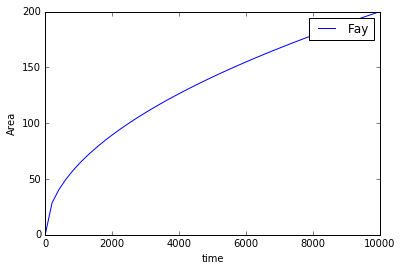

In [96]:
# as a function of time:
C = 2 # shouldn't be 1! more likely to find errors this way!
T = np.linspace(0, 10000)
A1 = C * np.sqrt(T)

fig, ax = plt.subplots()
ax.plot(T, A1, label="Fay")
ax.legend()
ax.set_xlabel("time")
ax.set_ylabel("Area")


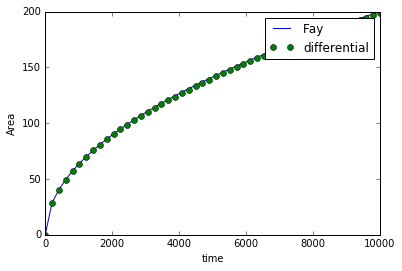

In [97]:
# as a differential equation:
def dadt(t):
    return 0.5 * C / np.sqrt(t)

# simple Euler method:
start = 10 # initilize with Fay
A2 = np.zeros_like(T)
A2[:start] = A1[:start]
dt = T[1] - T[0] # assume it's the same...
for i, t in enumerate(T[start:]):
    i += start
    A2[i] = A2[i-1] + dadt(t)*dt

fig, ax = plt.subplots()
ax.plot(T, A1, label="Fay")
ax.plot(T, A2, 'o', label="differential")
ax.legend()
ax.set_xlabel("time")
ax.set_ylabel("Area")


Note how the solutions sit right on top of each-other if you initialize right and use small enough time steps.

**NOTE:** maybe try RK method?

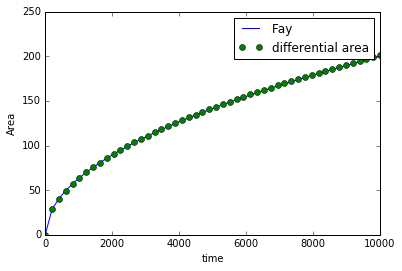

In [98]:
# differential equation in terms of Area

# initilize from Fay time dependent:
start = 10

def dadt(a):
    return 0.5 * C**2  / a

# simple Euler method:
A3 = np.zeros_like(T)
# small initial value to kick it off
A3[:start] = A1[:start]
dt = T[1] - T[0] # assume it's the same...
for i, t in enumerate(T[start:]):
    i += start
    A3[i] = A3[i-1] + dadt(A3[i-1])*dt
    
fig, ax = plt.subplots()
ax.plot(T, A1, label="Fay")
ax.plot(T, A3, 'o', label="differential area")
ax.legend()
ax.set_xlabel("time")
ax.set_ylabel("Area")

Solution exactly the same also -- with small enough time steps and the right initiliation.

## Compute with some real numbers:

$ C = \pi \cdot k_{\nu}  ( \frac{\Delta \rho \cdot g \cdot V^2}{\nu_w^{1/2}})$


In [103]:
# Some values to play with:
rho_oil = 900 # density of oil
vol = 795 # initial volume (m^3 -- 5000bbl)

C = np.pi * K1 * ( Delta(rho_oil) * g * vol**2 / np.sqrt(visc_w) )
print "C = ", C


C =  3632901286.62


timestep: 227.368421053 minutes


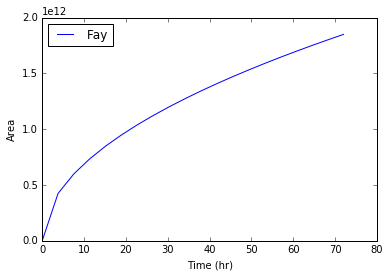

In [104]:
# differential equation in terms of Area

# Time zero to 72 hrs
T = np.linspace(0, 72*3600, 20)

print "timestep:", (T[1] - T[0]) / 60, "minutes"

Fay_area = C * np.sqrt(T) # straight Fay Gravity-viscous

A_0 = init_area(vol, rho_oil)


# initilize from Fay time dependent:
start = 2

def dadt(a):
    return 0.5 * C**2  / a

# simple Euler method:
A = np.zeros_like(T)
# small initial value to kick it off
A[:start] = A1[:start]
dt = T[1] - T[0] # assume it's the same...
for i, t in enumerate(T[start:]):
    i += start
    A[i] = A[i-1] + dadt(A[i-1])*dt

Thr = T / 3600
fig, ax = plt.subplots()
ax.plot(Thr, Fay_area, label="Fay")
#ax.plot(Thr, A, 'o',label="Numerical")
ax.legend(loc='upper left')
ax.hlines(A_0, Thr[0], Thr[-1])
#ax.annotate('initial area', 24, A_0)

ax.set_xlabel("Time (hr)")
ax.set_ylabel("Area")

In [102]:
A_0




316419.9094847797